In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal



In [131]:
pts1 = pd.read_csv("/home/n/pnts1.txt", delim_whitespace=True, engine = 'python', names = range(2))
pts1 = pts1.as_matrix()

In [132]:
pts2 = pd.read_csv("/home/n/pnts2.txt", delim_whitespace=True, engine = 'python', names = range(2))
pts2 = pts2.as_matrix()

In [43]:
import sklearn

In [44]:
from sklearn.cluster import KMeans

In [135]:
k1 = KMeans(init='k-means++',n_clusters=5, random_state=0,n_init=100).fit(pts1)

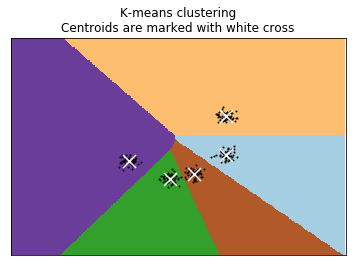

In [137]:
x_min, x_max = pts1[:, 0].min() - 1, pts1[:, 0].max() + 1
y_min, y_max = pts1[:, 1].min() - 1, pts1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = k1.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')
plt.plot(pts1[:, 0], pts1[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = k1.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [77]:
def kmeans_(pts1,k,h,title):
    k1 = KMeans(init='k-means++',n_clusters=k, random_state=0,n_init=10).fit(pts1)
    x_min, x_max = pts1[:, 0].min() - 1, pts1[:, 0].max() + 1
    y_min, y_max = pts1[:, 1].min() - 1, pts1[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = k1.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')
    plt.plot(pts1[:, 0], pts1[:, 1], 'k.', markersize=2)
    # Plot the centroids as a white X
    centroids = k1.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title(title)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

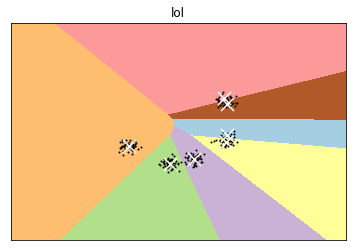

In [89]:
kmeans_(pts1,7,0.001,"lol")

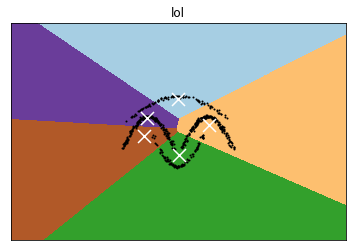

In [88]:
kmeans_(pts2,5,0.001,"lol")

# 1_2 

number of estimated clusters : 4


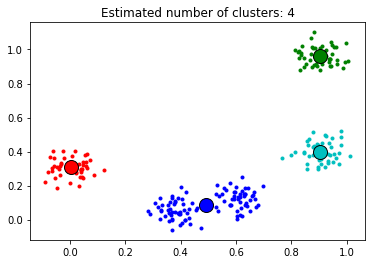

In [115]:
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(pts1, quantile=0.2, n_samples=len(pts1))

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(pts1)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(pts1[my_members, 0], pts1[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

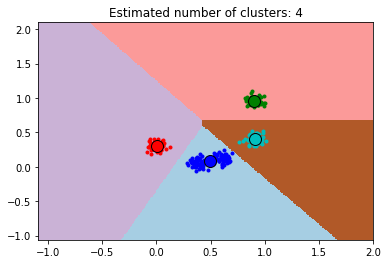

In [124]:
x_min, x_max = pts1[:, 0].min() - 1, pts1[:, 0].max() + 1
y_min, y_max = pts1[:, 1].min() - 1, pts1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = ms.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')
plt.plot(pts1[:, 0], pts1[:, 1], 'k.', markersize=0.02)


colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(pts1[my_members, 0], pts1[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=12)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# 1_3

# https://pythonmachinelearning.pro/clustering-with-gaussian-mixture-models/

In [188]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(pts1)


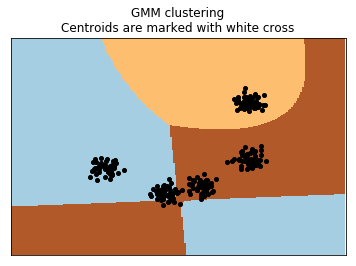

In [193]:
x_min, x_max = pts1[:, 0].min() - 0.5, pts1[:, 0].max() + 0.5
y_min, y_max = pts1[:, 1].min() - 0.5, pts1[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = gmm.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')
plt.plot(pts1[:, 0], pts1[:, 1], 'k.', markersize=8)
# Plot the centroids as a white X
# centroids = k1.cluster_centers_
# plt.scatter(centroids[:, 0], centroids[:, 1],
#             marker='x', s=169, linewidths=3,
#             color='w', zorder=10)
plt.title('GMM clustering\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [159]:


from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs,edgecolor="black",facecolor="white"))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    ax.set_facecolor("red")
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

# plt.rcParams['axes.facecolor'] = 'black'

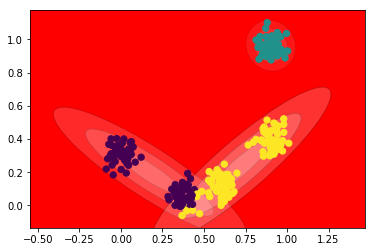

In [190]:
gmm = GaussianMixture(n_components=3, random_state=42)
plot_gmm(gmm, pts1)

# https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html

# 2_1 - 3

In [11]:
import numpy as np
import sys
from PIL import Image
from sklearn import preprocessing
from sklearn.metrics.pairwise import euclidean_distances
import skimage.color

In [219]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray
def getFeature(path,colorspace,types):
    from resizeimage import resizeimage
    with open(path, 'r+b') as f:
        with Image.open(f) as image:
            cover = resizeimage.resize_cover(image, [100, 100])
            cover.save('uu.jpg', image.format)
    q = plt.imread("/home/n/uu.jpg")
    
    if colorspace == "LAB":
        i2 = skimage.color.rgb2lab(q)
        i3 = (i2 + [0, 128, 128]) / [100, 255, 255]
        image = Image.fromarray(np.uint8((i3)*255))
        c = 3
    elif colorspace == "RGB":
        image = Image.fromarray(np.uint8((q)*255))
        c = 3
    elif colorspace == "GRAY":
        q = rgb2gray(q)
        image = Image.fromarray(np.uint8((q)*255))
        c = 1
    
    
    if types == 1:
        # keep c has same
        m = image.size[0]
        n = image.size[1]
#         c = image.size[2]
        # we need a matrix with size of (cxmn)
        data = np.zeros((m * n, c), dtype=float)
        for i in range(0,c):
            for y in range(m):
                for x in range(n):
                    rgb = image.getpixel((x,y)) # this gives pixel for all three dimension
                    # since data vector is 2D matrix, with 0,1,2 as column, 
                    data[x+y * m,i] = rgb[i]
#                     data[x+y * m,1] = rgb[1]
#                     data[x+y * m,2] = rgb[2]
        # this does the normalization part for us, we could have done individually for thr rows.
        Z = preprocessing.normalize(data)
        # array to store pixel, or simply mask
        return Z,data,m,n
    else:
                # keep c has same
        m = image.size[0]
        n = image.size[1]
#         c = image.size[2]
        # we need a matrix with size of (cxmn)
        data = np.zeros((m * n,c+2), dtype=float)
        for i in range(c):
            for y in range(m):
                for x in range(n):
                    rgb = image.getpixel((x,y)) # this gives pixel for all three dimension
                    # since data vector is 2D matrix, with 0,1,2 as column, 
                    data[x+y * m,i] = rgb[i]
#                     data[x+y * m,1] = rgb[1]
#                     data[x+y * m,2] = rgb[2]
        for y in range(m):
            for x in range(n):
                rgb = image.getpixel((x,y))
                data[x+y * m,3] = x
                data[x+y * m,4] = y
        # this does the normalization part for us, we could have done individually for thr rows.
        Z = preprocessing.normalize(data)
        return Z,data,m,n

        
        
    

In [194]:
def colorSegmentedImage(Z,k,iterations,lol,name,m,n,c):
    outputName = name
    # we will use cooncept of Gaussian mixture model, to predict randomly the center of clusters
    k1 = KMeans(init='k-means++',n_clusters=k, random_state=0,n_init=iterations).fit(Z)
    kk = k1.predict(lol)
    centers = k1.cluster_centers_
#     print(centers)
    if c == 1:
#         r, g, b = 255, 240, 227
#         intcolor = (b << 16 ) | (g << 8 ) | r
        import pdb
        for index, item in enumerate(kk):
            pdb.set_trace()
            lol[index][0] = int(round(centers[item][0]*255))
#             lol[index][1] = int(round(centers[item][1] * 255))
#             lol[index][2] = int(round(centers[item][2] * 255))
        image = Image.new("L", (m, n))

        for y in range(n):
            for x in range(m):
                image.putpixel((x, y), int(lol[y * m + x]))


    else:   
        for index, item in enumerate(kk):
            lol[index][0] = int(round(centers[item][0] * 255))
            lol[index][1] = int(round(centers[item][1] * 255))
            lol[index][2] = int(round(centers[item][2] * 255))

#Save image
        image = Image.new("RGB", (m, n))

        for y in range(n):
            for x in range(m):
                image.putpixel((x, y), (int(lol[y * m + x][0]), 
                                            int(lol[y * m + x][1]),
                                            int(lol[y * m + x][2])))
    image.save(outputName)
    plt.imshow(image)
    return pixel_cluster
    

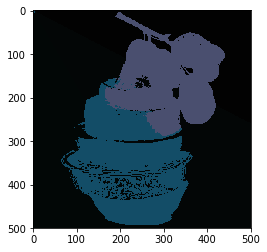

In [196]:
Z,lol,m,n = getFeature("/home/n/fruit.jpg","RGB",2)
o = colorSegmentedImage(Z,5,1,lol,"lop.jpg",m,n,2)

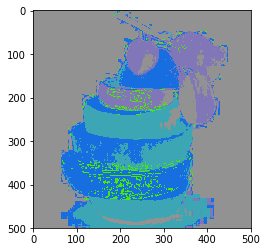

In [197]:
Z,lol,m,n = getFeature("/home/n/fruit.jpg","RGB",1)
o = colorSegmentedImage(Z,5,1,lol,"lop.jpg",m,n,2)

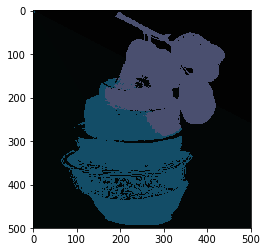

In [198]:
Z,lol,m,n = getFeature("/home/n/fruit.jpg","RGB",2)
o = colorSegmentedImage(Z,5,10,lol,"lop.jpg",m,n,2)

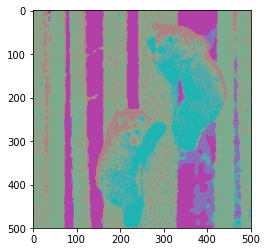

In [204]:
Z,lol,m,n = getFeature("/home/n/bears.jpg","LAB",1)
o = colorSegmentedImage(Z,7,100,lol,"lop.jpg",m,n,2)

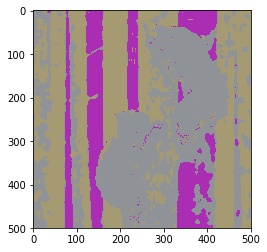

In [202]:
Z,lol,m,n = getFeature("/home/n/bears.jpg","RGB",1)
o = colorSegmentedImage(Z,3,100,lol,"lop.jpg",m,n,2)

# 2_4

In [237]:
Z,lol,m,n = getFeature("/home/n/fruit.jpg","LAB",1)
# o = colorSegmentedImage(Z,5,1,lol,"lop.jpg",m,n,2)

In [238]:
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(Z, quantile=0.2, n_samples=len(Z))

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(Z)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)


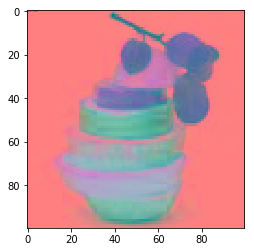

In [239]:
for index, item in enumerate(labels_unique):
    lol[index][0] = int(round(cluster_centers[item][0] * 255))
    lol[index][1] = int(round(cluster_centers[item][1] * 255))
    lol[index][2] = int(round(cluster_centers[item][2] * 255))

#Save image
    image = Image.new("RGB", (m, n))

for y in range(n):
    for x in range(m):
        image.putpixel((x, y), (int(lol[y * m + x][0]), 
                                            int(lol[y * m + x][1]),
                                            int(lol[y * m + x][2])))
image.save(outputName)
plt.imshow(image)
#     return pixel_cluster

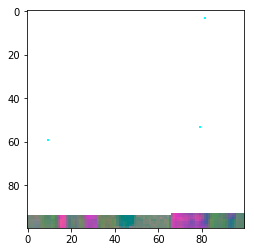

In [228]:
# Z,lol,m,n = getFeature("/home/n/bears.jpg","LAB",1)
# o = meanshift_seg(Z,0.2,lol,"pop.jpg",m,n)

In [ ]:
def meanshift_seg(Z,k,lol,outputName,m,n):   

    from sklearn.cluster import MeanShift, estimate_bandwidth
    bandwidth = estimate_bandwidth(Z, quantile=k, n_samples=len(Z))

    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(lol)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)

    for index, item in enumerate(labels_unique):
        lol[index][0] = int(round(cluster_centers[item][0] * 255))
        lol[index][1] = int(round(cluster_centers[item][1] * 255))
        lol[index][2] = int(round(cluster_centers[item][2] * 255))

    #Save image
        image = Image.new("RGB", (m, n))

    for y in range(n):
        for x in range(m):
            image.putpixel((x, y), (int(lol[y * m + x][0]), 
                                                int(lol[y * m + x][1]),
                                                int(lol[y * m + x][2])))
    image.save(outputName)
    plt.imshow(image)
    #     return pixel_cluster

# 3_1

In [7]:
I = plt.imread("/home/n/images/peppers.jpg")

In [134]:
I = I/I.max() 

In [135]:
I.max()

1.0

In [149]:

def colorv(I):
    if I.max() > 1:
        I = I/I.max()
    else:
        pass
    
    Q = np.linalg.pinv(np.array([[0.96,0,0],[0,0.96,0],[0,0,1.11]]))

    W = np.array([[0.06,0.63,0.27],[0.3,0.04,-0.35],[0.34,-0.6,0.17]])

    C = (np.array([0,0.35,0.6])).reshape((3,1))

    K = np.zeros_like(I)


    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            B,G,R = I[i,j]
            u = (np.array([B,G,R])).reshape((3,1))
            E = np.dot(W,u)+C
            jj = (np.dot(Q,E)).reshape((1,3))
    #         print(j)
            K[i,j,:] = jj
    plt.imshow(K)
    return K

        
        
    

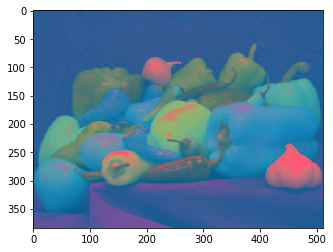

In [150]:
h = colorv(I)

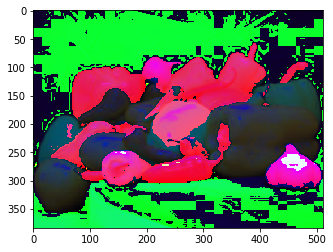

In [125]:
plt.imshow(hsv)

# 4_2

In [113]:
I.max()

255

In [151]:
import scipy.io as sio

In [155]:
import pandas as pd

In [159]:
import scipy.io
import numpy as np
x = sio.loadmat("/home/n/PetsTrain.mat")


In [197]:
x = sio.loadmat("/home/n/PetsTrain.mat")

In [199]:
x

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Apr 14 19:23:35 2016',
 '__version__': '1.0',
 'catDetectorTest': array([[1],
        [1],
        [0],
        ...,
        [1],
        [1],
        [1]], dtype=uint8),
 'catDetectorTrain': array([[0],
        [0],
        [1],
        ...,
        [0],
        [0],
        [0]], dtype=uint8),
 'files': array([[array(['Abyssinian_100.jpg'], dtype='<U18')],
        [array(['Abyssinian_101.jpg'], dtype='<U18')],
        [array(['Abyssinian_102.jpg'], dtype='<U18')],
        ...,
        [array(['yorkshire_terrier_189.jpg'], dtype='<U25')],
        [array(['yorkshire_terrier_18.jpg'], dtype='<U24')],
        [array(['yorkshire_terrier_190.jpg'], dtype='<U25')]], dtype=object),
 'head': array([[151,  71, 335, 267],
        [ 54,  36, 319, 235],
        [ 23,  27, 325, 320],
        ...,
        [274,  84, 402, 207],
        [ 52,  23, 289, 183],
        [ 78,  62, 305, 256]], dtype=uint32),
 'hea

In [200]:
I = x["files"]

In [177]:
q = x["head"]

In [179]:
q.shape

(3680, 4)

In [180]:
l = x["label"]

In [181]:
l.shape

(3680, 1)

In [184]:
q[0]

array([151,  71, 335, 267], dtype=uint32)

In [186]:
q[0].shape

(4,)

19.36842105263158

In [188]:
32*32*3

3072

In [189]:
32*32*4

4096

In [192]:
q.reshape((3680,4))

ValueError: cannot reshape array of size 14720 into shape (32,32,3)

In [193]:
32*32*3

3072

In [194]:
14720/3072

4.791666666666667

In [201]:
len(I)

3680

In [202]:
I

array([[array(['Abyssinian_100.jpg'], dtype='<U18')],
       [array(['Abyssinian_101.jpg'], dtype='<U18')],
       [array(['Abyssinian_102.jpg'], dtype='<U18')],
       ...,
       [array(['yorkshire_terrier_189.jpg'], dtype='<U25')],
       [array(['yorkshire_terrier_18.jpg'], dtype='<U24')],
       [array(['yorkshire_terrier_190.jpg'], dtype='<U25')]], dtype=object)

# 4_3

In [1]:
import tensorflow as tf
import numpy as np

/home/n/anaconda3/envs/tensorflow/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [19]:
import vgg19

In [20]:
model = vgg19.Vgg19(vgg19_npy_path="/home/n/vgg19.npy")

npy file loaded


In [42]:
def get_resized_image(img_path, width, height, save=True):
    image = Image.open(img_path)
#     image = image/255
    # PIL is column major so you have to swap the places of width and height
    image = ImageOps.fit(image, (width, height), Image.ANTIALIAS)
    if save:
        image_dirs = img_path.split('/')
        image_dirs[-1] = 'resized_' + image_dirs[-1]
        out_path = '/'.join(image_dirs)
        if not os.path.exists(out_path):
            image.save(out_path)
    image = np.asarray(image, np.float32)
    return np.expand_dims(image, 0)


In [2]:
import os
import time
from PIL import Image, ImageOps
import numpy as np
import scipy.misc
from six.moves import urllib

In [46]:
gg = g[:,:,:,:]/255

In [47]:
gg.shape

(1, 224, 224, 3)

In [50]:
checkpoints_dir = '/home/n/projectdl/data/'

In [ ]:
from matplotlib import pyplot as plt

import numpy as np
import os
import tensorflow as tf
# import urllib2

# from datasets import imagenet
from nets import vgg
from preprocessing import vgg_preprocessing

checkpoints_dir = '/home/dpakhom1/checkpoints'

slim = tf.contrib.slim

# We need default size of image for a particular network.
# The network was trained on images of that size -- so we
# resize input image later in the code.
image_size = vgg.vgg_16.default_image_size


with tf.Graph().as_default():
    
    url = ("https://upload.wikimedia.org/wikipedia/commons/d/d9/"
           "First_Student_IC_school_bus_202076.jpg")
    
    # Open specified url and load image as a string
    image_string = urllib2.urlopen(url).read()
    
    # Decode string into matrix with intensity values
    image = tf.image.decode_jpeg(image_string, channels=3)
    
    # Resize the input image, preserving the aspect ratio
    # and make a central crop of the resulted image.
    # The crop will be of the size of the default image size of
    # the network.
    processed_image = vgg_preprocessing.preprocess_image(image,
                                                         image_size,
                                                         image_size,
                                                         is_training=False)
    
    # Networks accept images in batches.
    # The first dimension usually represents the batch size.
    # In our case the batch size is one.
    processed_images  = tf.expand_dims(processed_image, 0)
    
    # Create the model, use the default arg scope to configure
    # the batch norm parameters. arg_scope is a very conveniet
    # feature of slim library -- you can define default
    # parameters for layers -- like stride, padding etc.
    with slim.arg_scope(vgg.vgg_arg_scope()):
        logits, _ = vgg.vgg_16(processed_images,
                               num_classes=1000,
                               is_training=False)
    
    # In order to get probabilities we apply softmax on the output.
    probabilities = tf.nn.softmax(logits)
    
    # Create a function that reads the network weights
    # from the checkpoint file that you downloaded.
    # We will run it in session later.
    init_fn = slim.assign_from_checkpoint_fn(
        os.path.join(checkpoints_dir, 'vgg_16.ckpt'),
        slim.get_model_variables('vgg_16'))
    
    with tf.Session() as sess:
        
        # Load weights
        init_fn(sess)
        
        # We want to get predictions, image as numpy matrix
        # and resized and cropped piece that is actually
        # being fed to the network.
        np_image, network_input, probabilities = sess.run([image,
                                                           processed_image,
                                                           probabilities])
        probabilities = probabilities[0, 0:]
        sorted_inds = [i[0] for i in sorted(enumerate(-probabilities),
                                            key=lambda x:x[1])]
    
    # Show the downloaded image
    plt.figure()
    plt.imshow(np_image.astype(np.uint8))
    plt.suptitle("Downloaded image", fontsize=14, fontweight='bold')
    plt.axis('off')
    plt.show()
    
    # Show the image that is actually being fed to the network
    # The image was resized while preserving aspect ratio and then
    # cropped. After that, the mean pixel value was subtracted from
    # each pixel of that crop. We normalize the image to be between [-1, 1]
    # to show the image.
    plt.imshow( network_input / (network_input.max() - network_input.min()) )
    plt.suptitle("Resized, Cropped and Mean-Centered input to network",
                 fontsize=14, fontweight='bold')
    plt.axis('off')
    plt.show()

    names = imagenet.create_readable_names_for_imagenet_labels()
    for i in range(5):
        index = sorted_inds[i]
        # Now we print the top-5 predictions that the network gives us with
        # corresponding probabilities. Pay attention that the index with
        # class names is shifted by 1 -- this is because some networks
        # were trained on 1000 classes and others on 1001. VGG-16 was trained
        # on 1000 classes.
        print('Probability %0.2f => [%s]' % (probabilities[index], names[index+1]))
        
    res = slim.get_model_variables()